In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\Clustering\EastWestAirlines_1.csv")

In [4]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.shape

(3999, 12)

In [6]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
null_counts = data.isnull().sum()
print(null_counts)

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64


There are no missing values in data

In [8]:
data.drop(["ID"],inplace = True, axis = 1)

In [9]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


**Verifying unique values**

In [11]:
data.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award                   2
dtype: int64

In [12]:
#cc1_miles
data.cc1_miles.value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [13]:
#cc2_miles
data.cc2_miles.value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

In [14]:
#cc3_miles
data.cc3_miles.value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

In [15]:
# AWARD
data.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

<AxesSubplot:xlabel='Award', ylabel='count'>

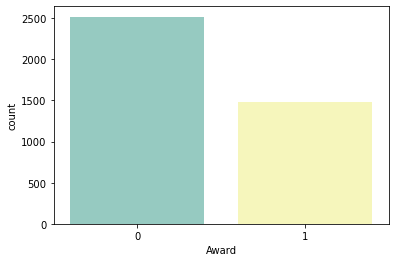

In [16]:
sns.countplot(x="Award", data= data, palette = 'Set3')

<AxesSubplot:xlabel='cc1_miles', ylabel='count'>

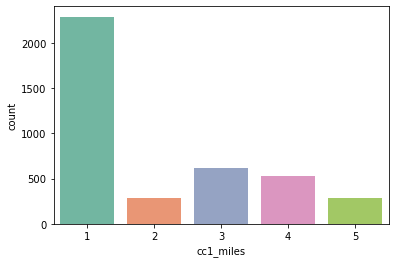

In [17]:
sns.countplot(x="cc1_miles", data= data, palette = 'Set2')

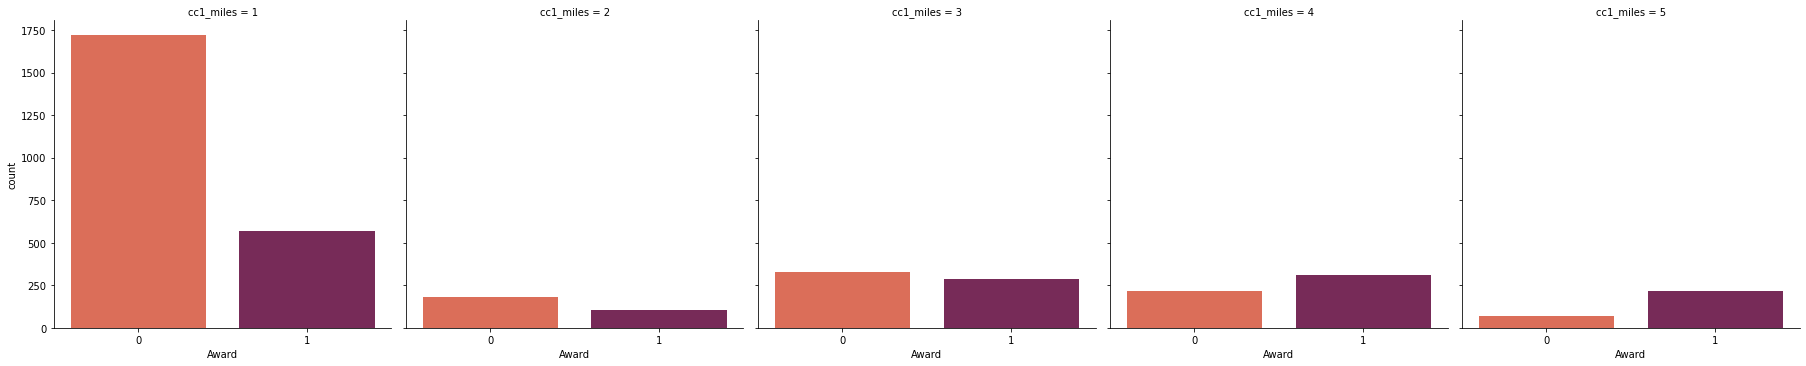

In [18]:
sns.catplot(x='Award', col='cc1_miles', kind = 'count',
           data=data, palette='rocket_r')

Dividing the variables as categorical and numerical variables:-

In [19]:
cat_list=[]
num_list=[]


for i in data.columns:
    unique_values = len(data[i].unique())
    if unique_values<10:
        cat_list.append(i)
    else:
        num_list.append(i)

In [20]:
print(cat_list)
print('\n',num_list)

['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award']

 ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']


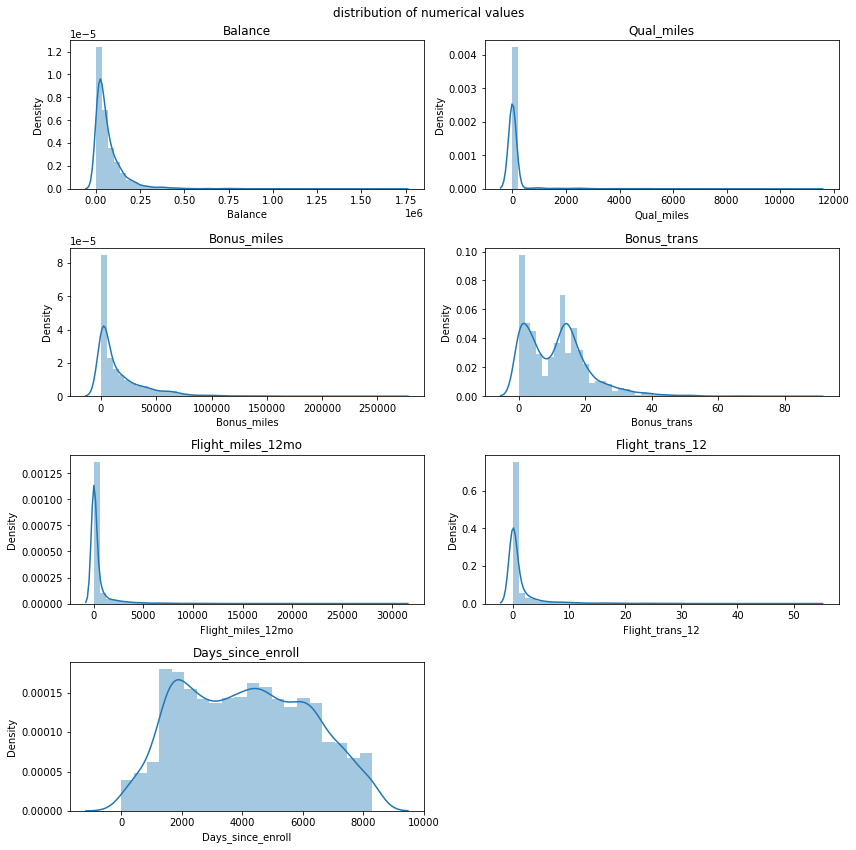

In [21]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
for i in data.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(data[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

Here we can see that all the variables are positively skewed

**Outlier analysis**

In [22]:
for i in data.loc[:,num_list]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data[(data[i] > up) | (data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

Balance yes
Qual_miles yes
Bonus_miles yes
Bonus_trans yes
Flight_miles_12mo yes
Flight_trans_12 yes
Days_since_enroll no


Outliers appear in other variables except days_since_enroll

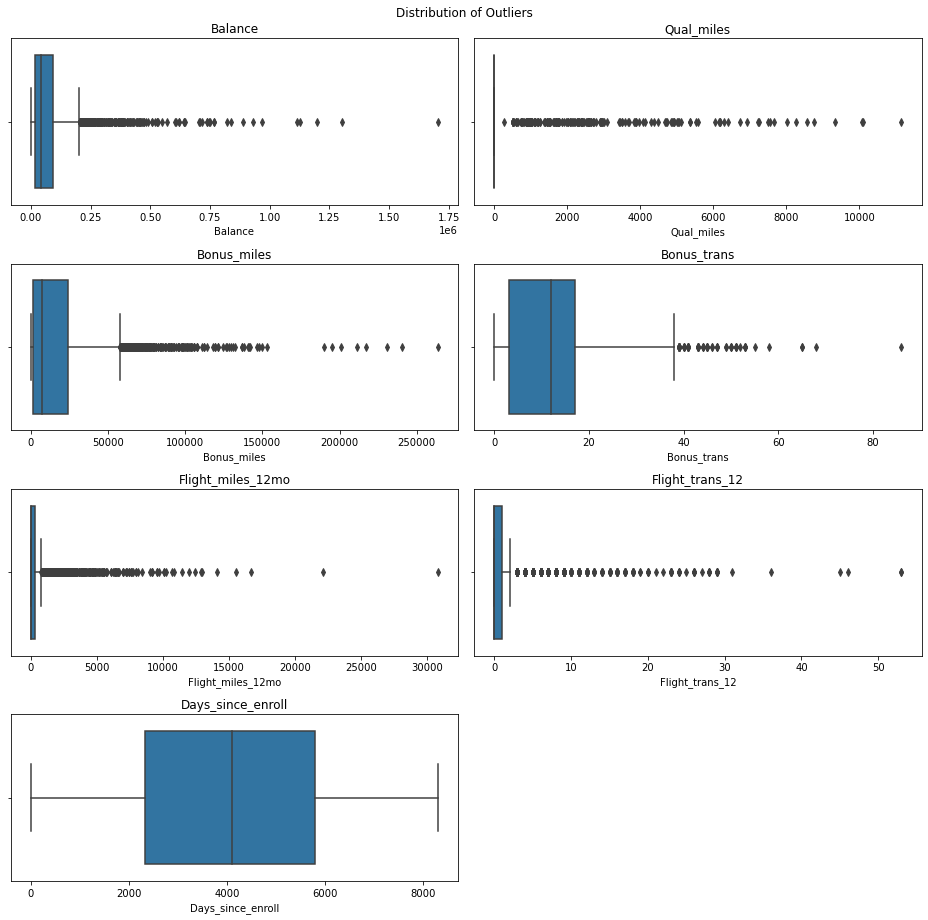

In [23]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [24]:
out_list=["Bonus_trans","Flight_miles_12mo","Flight_trans_12"]

In [25]:
data.loc[:,num_list]

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [26]:
# remove outliers;
for i in data.loc[:,out_list]:
    
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    data.loc[data[i]>up_lim,i]=up_lim
    data.loc[data[i]<low_lim,i]=low_lim

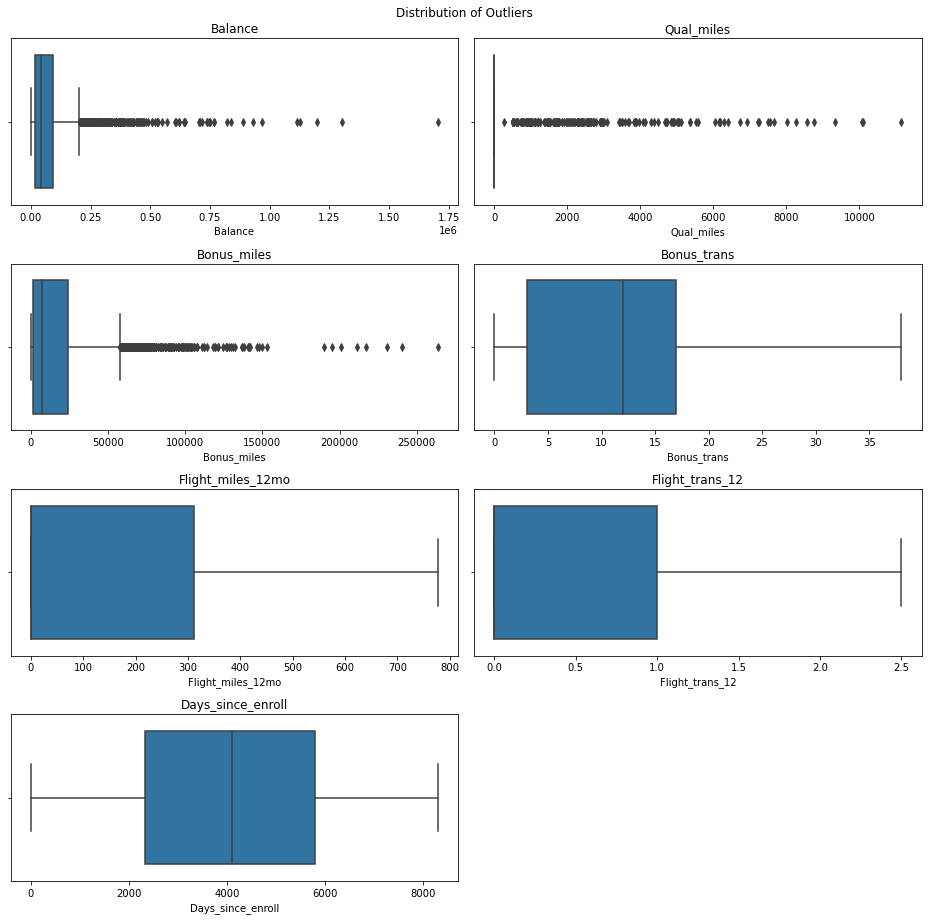

In [27]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list])
    plt.title(i)
    plt.tight_layout()
    k+=1

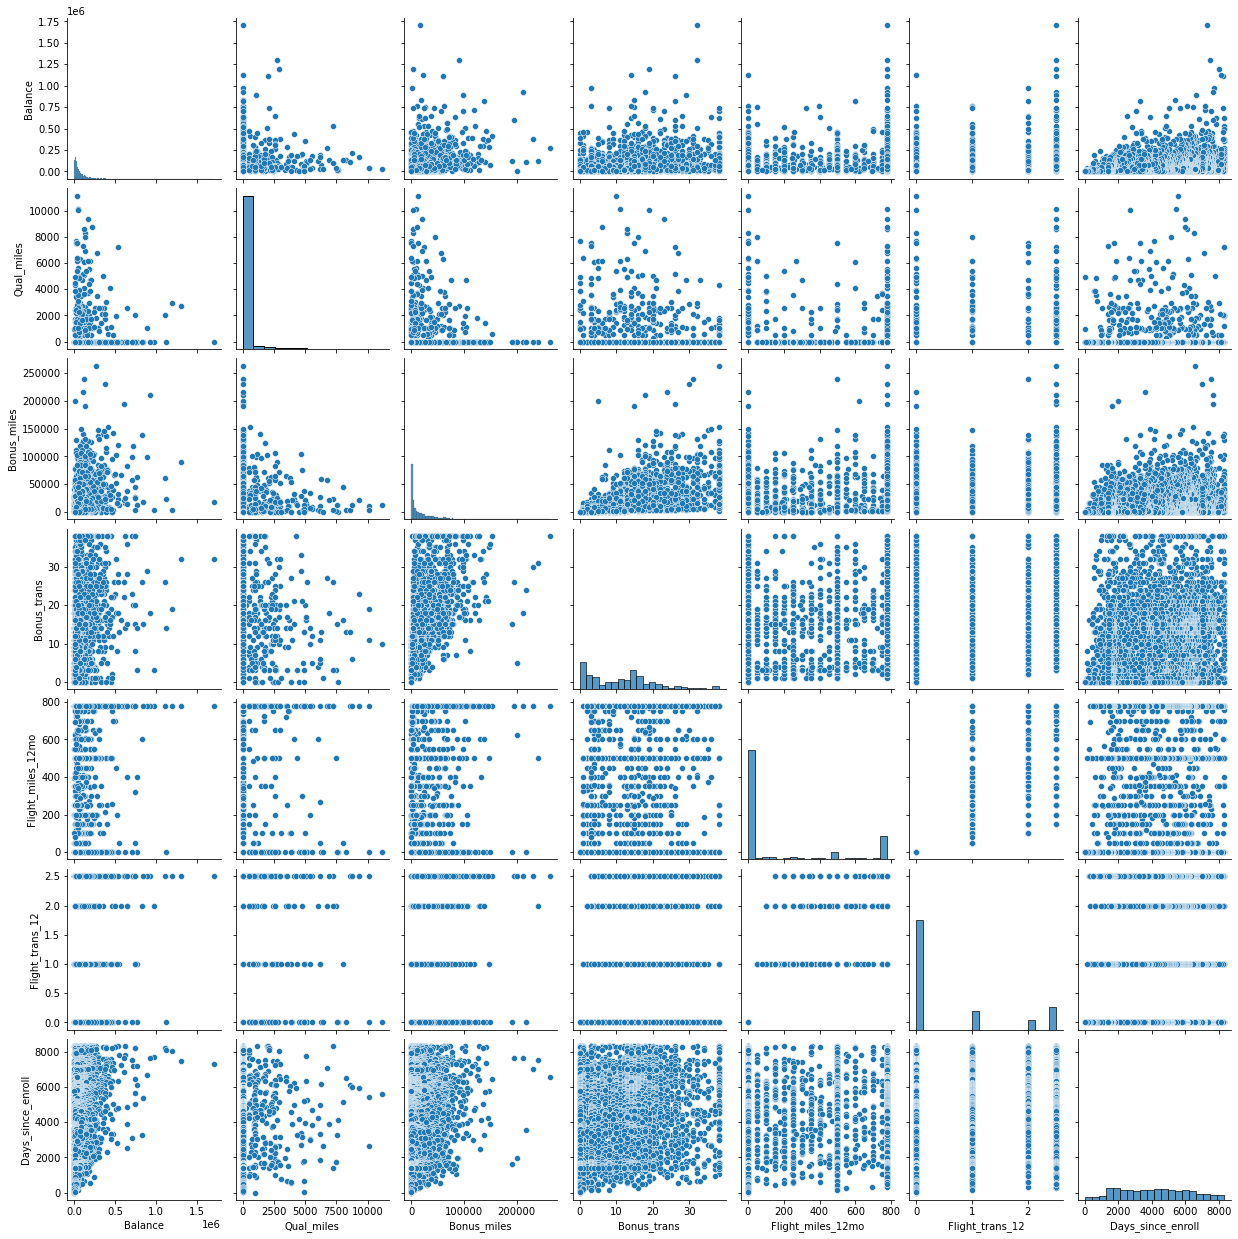

In [28]:
sns.pairplot(data.loc[:,num_list]);

**Correlation Analysis**

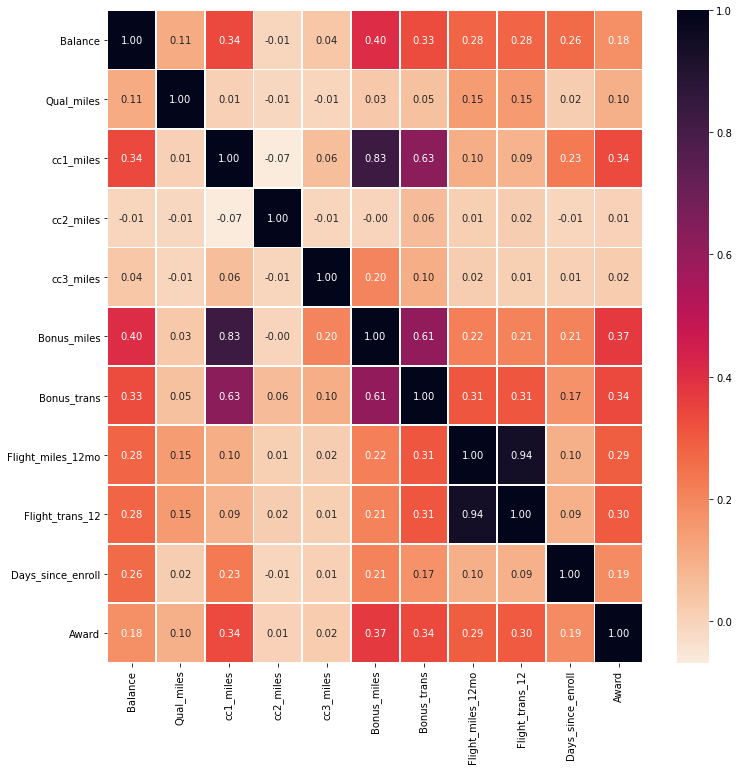

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="rocket_r")
plt.show()

There is a very high correlation between the two variables

**Normalizing the data**

In [30]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [31]:
data_norm = norm_func(data.iloc[:,:])  

In [32]:
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.026316,0.0,0.0,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.052632,0.0,0.0,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.105263,0.0,0.0,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.026316,0.0,0.0,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.684211,1.0,1.0,0.835905,1.0


# KMeans Clustering

In [33]:
from sklearn.cluster import KMeans

**Elbow Method**

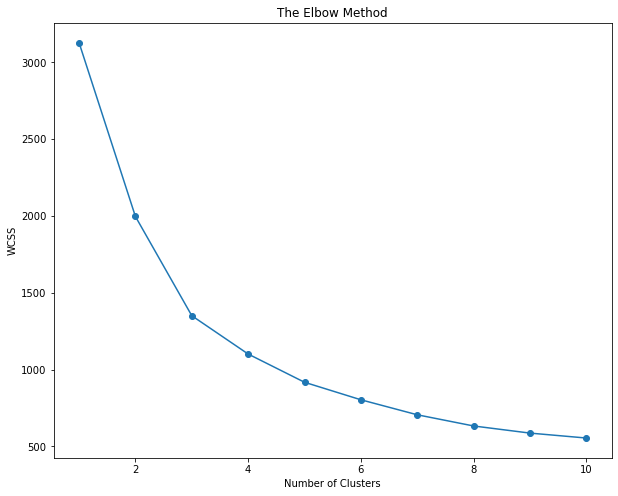

In [34]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

**The optimal cluster size is 4, as from the above elbow curve**

In [35]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data_norm)  

In [36]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([1, 1, 1, ..., 2, 3, 1])

In [37]:
y_kmeans 

array([1, 1, 1, ..., 2, 3, 1])

In [38]:
clf.cluster_centers_ 

array([[ 8.00421151e-02,  3.53861900e-02,  4.04508197e-01,
         1.06557377e-02,  6.14754098e-03,  1.29525486e-01,
         4.88524590e-01,  8.58135048e-01,  8.53442623e-01,
         5.66540695e-01,  1.00000000e+00],
       [ 3.12450482e-02,  6.16964161e-03,  1.69347096e-01,
         7.68122900e-03,  1.92030725e-03,  3.60863736e-02,
         2.24663315e-01,  9.83987663e-03,  2.11233797e-02,
         4.55595326e-01, -4.44089210e-16],
       [ 4.07401918e-02,  1.18533564e-02,  4.23076923e-01,
         5.74052813e-03,  3.44431688e-03,  9.56810116e-02,
         3.50564989e-01,  3.46838649e-02,  5.60275545e-02,
         5.50995602e-01,  1.00000000e+00],
       [ 5.34508952e-02,  1.59434814e-02,  2.09770115e-01,
         3.44827586e-03,  3.44827586e-03,  5.17220151e-02,
         3.12220206e-01,  7.85389363e-01,  7.65057471e-01,
         4.83473166e-01, -2.22044605e-16]])

In [39]:
clf.inertia_

1101.5879670497802

In [40]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
data['cluster']=md # creating a  new column and assigning it to new column 
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1.0,0.0,0.0,7000,0,1
1,19244,0,1,1,1,215,2.0,0.0,0.0,6968,0,1
2,41354,0,1,1,1,4123,4.0,0.0,0.0,7034,0,1
3,14776,0,1,1,1,500,1.0,0.0,0.0,6952,0,1
4,97752,0,4,1,1,43300,26.0,777.5,2.5,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4.0,200.0,1.0,1403,1,2
3995,64385,0,1,1,1,981,5.0,0.0,0.0,1395,1,2
3996,73597,0,3,1,1,25447,8.0,0.0,0.0,1402,1,2
3997,54899,0,1,1,1,500,1.0,500.0,1.0,1401,0,3


In [41]:
data.iloc[:,:].groupby(data.cluster).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,,,
0,136458.839344,394.485246,2.618033,1.021311,1.024590,34153.927869,18.563934,667.200000,2.133607,4700.888525,1.0
1,53267.745559,68.779165,1.677388,1.015362,1.007681,9515.435430,8.537206,7.650504,0.052808,3780.707633,0.0
2,69455.427095,132.141217,2.692308,1.011481,1.013777,25229.647532,13.321470,26.966705,0.140069,4571.957520,1.0
3,91125.117241,177.737931,1.839080,1.006897,1.013793,13638.319540,11.864368,610.640230,1.912644,4011.926437,0.0


In [42]:
plt.style.use(['classic']) 
print(plt.style.available)  

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [43]:
WCSS 

[3127.579614666674,
 1996.5944034585202,
 1350.950665256199,
 1101.5879670497802,
 917.9009604605118,
 803.9255606097544,
 706.2988909425044,
 633.460781755046,
 587.1175310608787,
 555.0070973653169]

In [44]:
data.cluster.value_counts()

1    2083
2     871
0     610
3     435
Name: cluster, dtype: int64

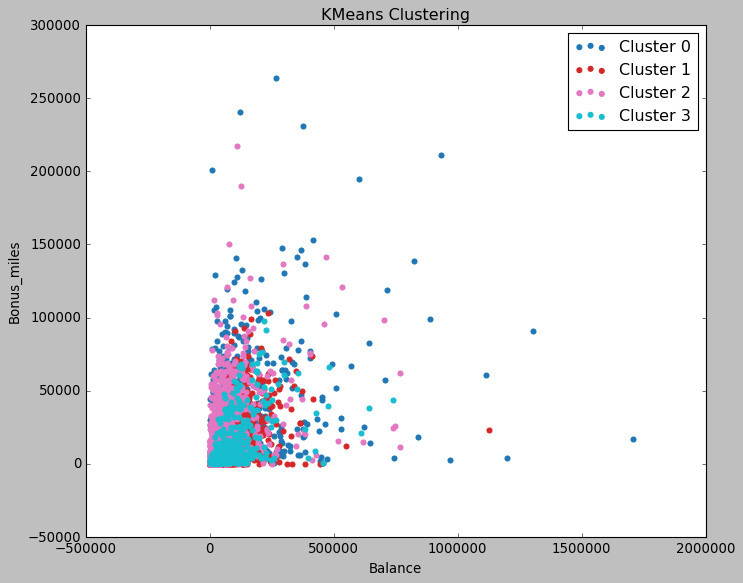

In [45]:
# Select the two features for the scatter plot
x_feature = 'Balance'
y_feature = 'Bonus_miles'

# Scatter plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(data['cluster'])
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], 
                label=f'Cluster {cluster}', color=color)

# Adding labels and title
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('KMeans Clustering')
plt.legend()
plt.show()

# Hierarchical Clustering

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

Hierarchial Clustering with **single linkage**:

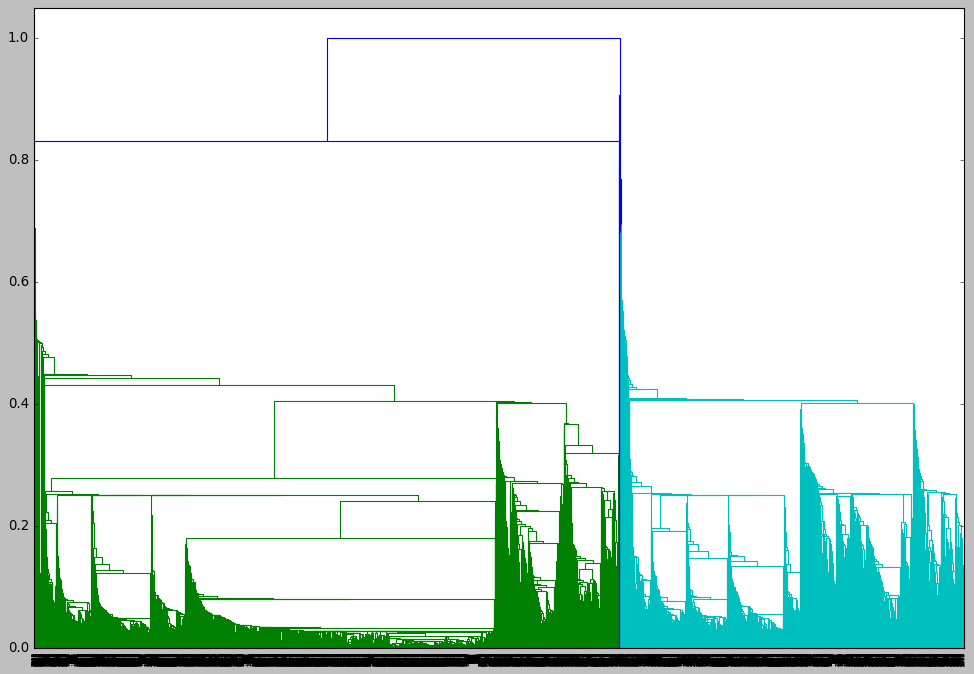

In [47]:
plt.figure(figsize=(15,10))
mergings = linkage(data_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

The seperation in Single Linkage Method indicates that **3 is the optimal number for clusters**

Hierarchial Clustering with **complete linkage**:

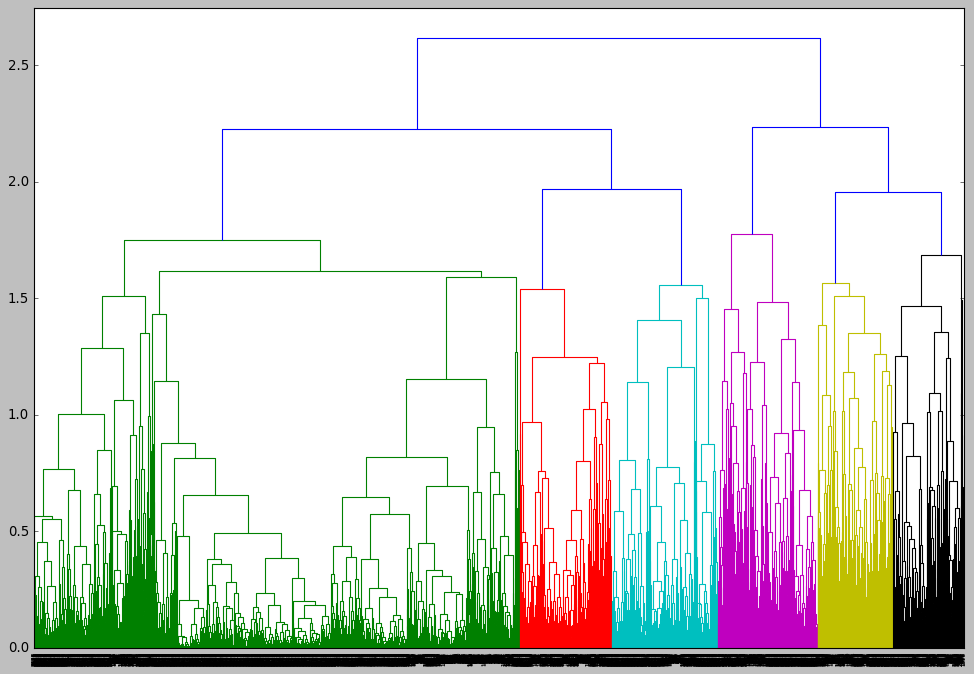

In [48]:
plt.figure(figsize=(15,10))
mergings = linkage(data_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

The seperation in Complete Linkage Method indicates that **7 is the optimal number for clusters**

Hierarchial Clustering with **average linkage**:


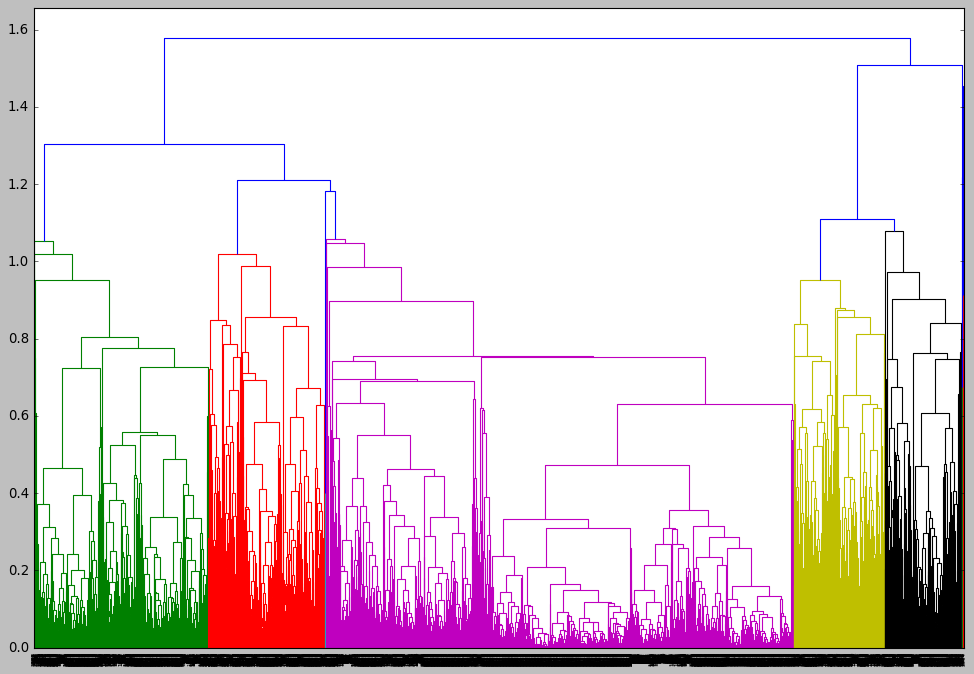

In [49]:
plt.figure(figsize=(15,10))
mergings = linkage(data_norm, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

The seperation in Average Linkage Method indicate that **6 is the optimal number for clusters**

Hierarchial Clustering with **ward method**:

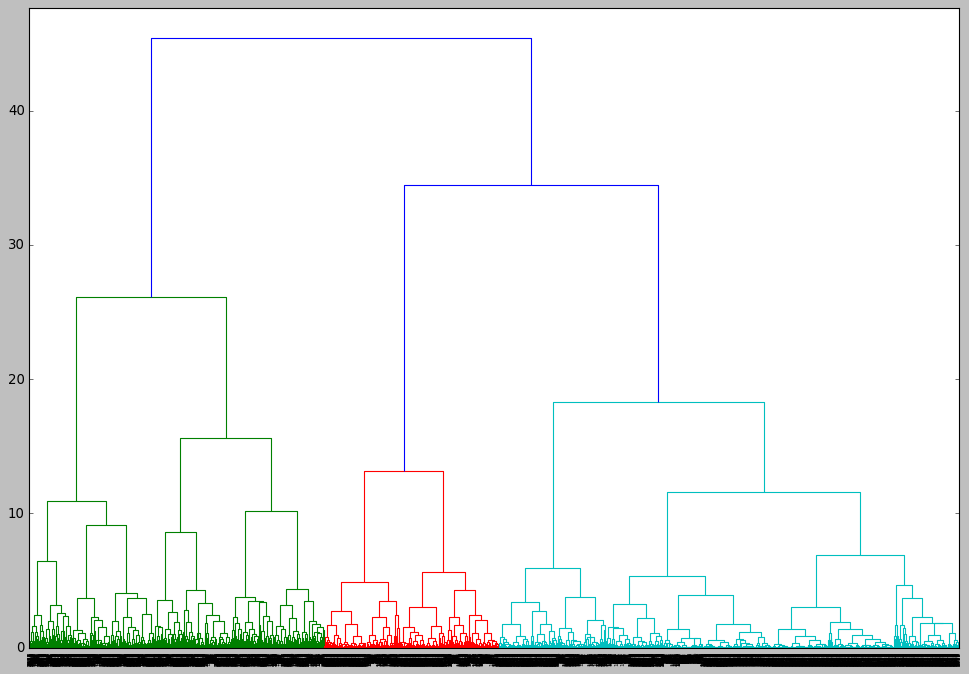

In [50]:
plt.figure(figsize=(15,10))
mergings = linkage(data_norm, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

The seperation in Ward Method indicate that **4 is the optimal number for clusters**

**We are getting same number of clusters i.e 4 from KMeans clustering method and Ward hierarchical clustering method.**

Thus, the consistency in the number of clusters obtained from both KMeans and Ward hierarchical clustering methods suggests a robust underlying cluster structure in the data. 
This alignment indicates that the identified clusters are likely well-defined and stable across different clustering algorithms.

# DBSCAN Method

In [51]:
from sklearn.cluster import DBSCAN

DBSCAN_epsilon

In [52]:
db = DBSCAN(eps=0.5, min_samples=5).fit(data_norm)

In [53]:
# Add cluster labels to the DataFrame
data['Cluster_db_epsilon'] = db.labels_

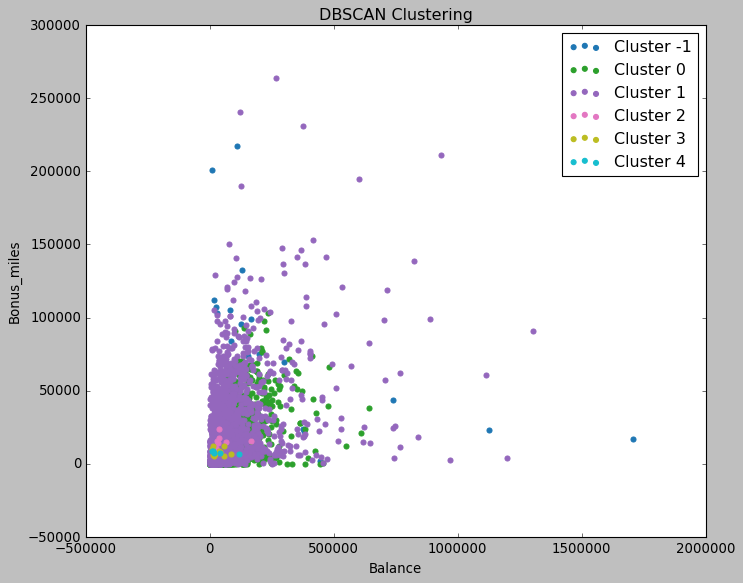

In [54]:
# Select the two features for the scatter plot
x_feature = 'Balance'
y_feature = 'Bonus_miles'

# Scatter plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(data['Cluster_db_epsilon'])
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_data = data[data['Cluster_db_epsilon'] == cluster]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], 
                label=f'Cluster {cluster}', color=color)

# Adding labels and title
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

DBSCAN_minPts

In [55]:
from sklearn.neighbors import NearestNeighbors

In [56]:
# Calculate the distance to the nearest neighbors
minPts = 4  # Example value for minPts
neigh = NearestNeighbors(n_neighbors=minPts)
nbrs = neigh.fit(data_norm)
distances, indices = nbrs.kneighbors(data_norm)

# Sort distances
distances = np.sort(distances, axis=0)
k_distances = distances[:, minPts-1]

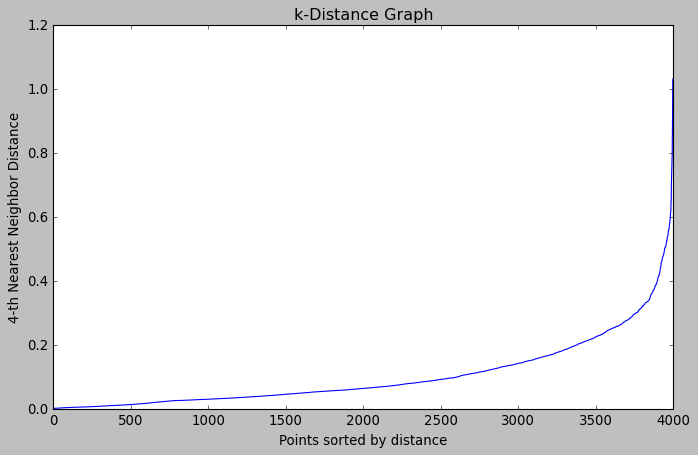

In [57]:
# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{minPts}-th Nearest Neighbor Distance')
plt.title('k-Distance Graph')
plt.show()

In [58]:
# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=minPts).fit(data_norm)

In [59]:
# Add cluster labels to the DataFrame
data['Cluster_db_minPts'] = db.labels_

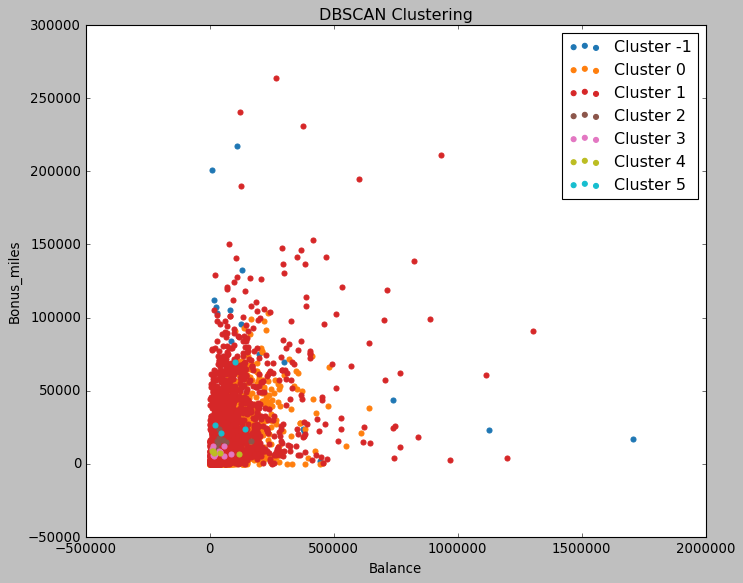

In [60]:
# Select the two features for the scatter plot
x_feature = 'Balance'
y_feature = 'Bonus_miles'

# Scatter plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(data['Cluster_db_minPts'])
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_data = data[data['Cluster_db_minPts'] == cluster]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], 
                label=f'Cluster {cluster}', color=color)

# Adding labels and title
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

# Silhouette Score

In [61]:
from sklearn.metrics import silhouette_score

**Silhouette score for KMeans clustering method:**

In [62]:
# Calculate the silhouette score
labels = data['cluster']
# Exclude noise points (label = -1) from the silhouette score calculation
sil_score_KMeans = silhouette_score(data_norm[labels != -1], labels[labels != -1])

print(f'Silhouette Score for KMeans clustering: {sil_score_KMeans}')

Silhouette Score for KMeans clustering: 0.44822404999781135


**Silhouette score for DBSCAN clustering method:**

In [63]:
# Calculate the silhouette score
labels = data['Cluster_db_epsilon']
# Exclude noise points (label = -1) from the silhouette score calculation
sil_score_dbscan = silhouette_score(data_norm[labels != -1], labels[labels != -1])

print(f'Silhouette Score for DBSCAN clustering: {sil_score_dbscan}')

Silhouette Score for DBSCAN clustering: 0.036143078913704066


# CONCLUSION

**KMeans Clustering:**

The silhouette score of 0.4482 indicates that the clustering structure is relatively well-defined.
Points are reasonably well-clustered, with most points being closer to their own cluster center compared to other clusters.

Thus KMeans is doing a decent job at finding clusters in the dataset.

**DBSCAN Clustering:**

The silhouette score of 0.0361 is very low, indicating that the clustering structure is not well-defined.
Points are not well-separated, with many points potentially being classified as noise or being on the border of clusters.

**For Hierarchical Clustering:**

**We are getting same number of clusters i.e 4 from KMeans clustering method and Ward hierarchical clustering method.**

Thus, the consistency in the number of clusters obtained from both KMeans and Ward hierarchical clustering methods suggests a robust underlying cluster structure in the data. 
This alignment indicates that the identified clusters are likely well-defined and stable across different clustering algorithms.